In [66]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [67]:
# Lets do a gradient boost with SKlearn
# We'll use the European social survey again, but now with a categorical outcome: 
# Whether someone lives with a partner

In [68]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

In [111]:
# Since are working with a binary outcome, we have switched to a classifier
# Now our loss function can't be residuals.  It can be 'deviance' or 'exponential'.
# Deviance is used for logistical regression, and we'll try that here.

In [70]:
# We'll make 500 iterations, use 2-deep trees, and set out loss function.
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.04650845608292417
Percent Type II Errors: 0.17607746863066012
Test Set Accuracy: 
Percent Type I Errors: 0.06257668711656442
Percent Type II Errors: 0.18527607361963191

0.777414075286
0.752147239264


In [71]:
# Unlike decision trees, gradient boosts are not easy to interpret on the surface, but they aren't a black box.
# We can get a measure of how important various features are by counting how many times a feature is used
# over the course of many decision trees.

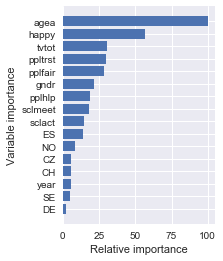

In [72]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) +  0.5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.ylabel('Variable importance')
plt.show()

In [73]:
# It appears that age and happiness are the most important features when predicting whether someone lives
# with a partner or not

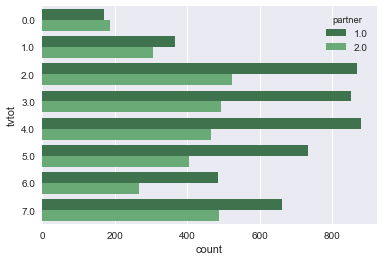

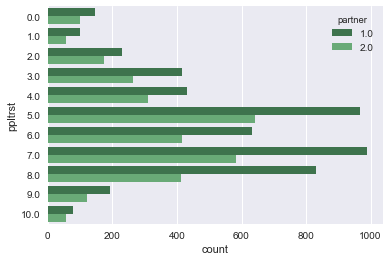

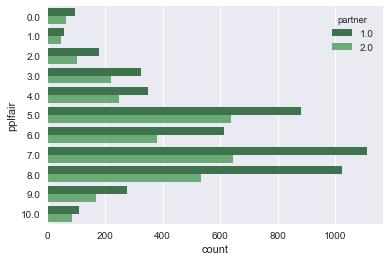

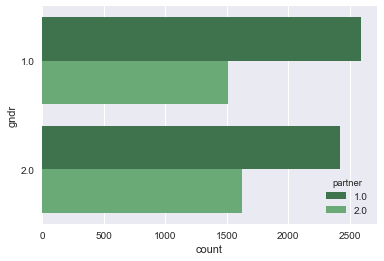

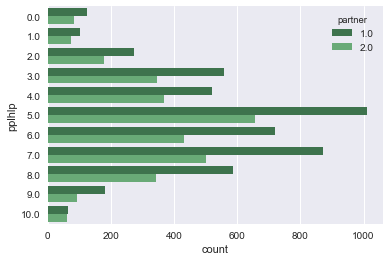

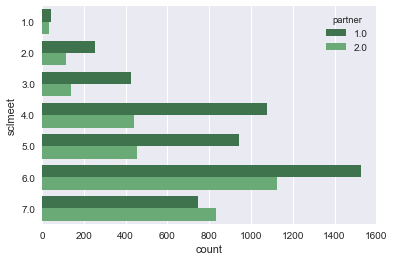

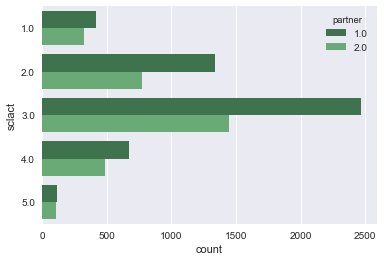

In [74]:
# Lets further examine some of the input variables relationships to the outcome variable

# Lets do a countplot to show the relationship between sclmeet and partner

cat_var = [df['tvtot'], df['ppltrst'], df['pplfair'], df['gndr'], df['pplhlp'], df['sclmeet'], df['sclact']]

for item in cat_var:
    sns.countplot(y=item, hue='partner', data=df, palette='Greens_d')
    plt.show()


In [75]:
#Lets try making more categorical variables 

In [76]:
# New tvot variables; a little TV, medium amount of TV, large amount of TV
df['tvtot_small'] = np.where(df['tvtot'] < 2, 1, 0)
df['tvtot_med'] = np.where((2 <= df['tvtot']) < 5, 1, 0)
df['tvtot_lg'] = np.where(df['tvtot'] >= 5, 1, 0)

# New 

# New sclmeet variable; where people socialize with friends etc. once a week or less
df['sclmeet_less'] = np.where(df['sclmeet'] <= 5, 1, 0)

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,tvtot_small,tvtot_med,tvtot_lg,sclmeet_less
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,0,1,0,1
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,0,1,1,1
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,1,1,0,0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,0,1,0,0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,0,1,1,0


In [77]:
# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

In [78]:
# We'll make 500 iterations, use 2-deep trees, and set out loss function.
params = {'n_estimators': 500,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.04650845608292417
Percent Type II Errors: 0.17607746863066012
Test Set Accuracy: 
Percent Type I Errors: 0.06257668711656442
Percent Type II Errors: 0.18527607361963191

0.777414075286
0.752147239264


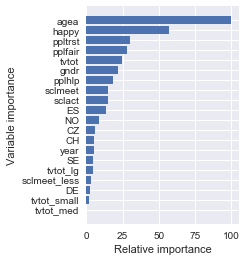

In [79]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance
feature_importance = 100 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) +  0.5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.ylabel('Variable importance')
plt.show()

In [42]:
# It appears that the new feature did not affect the accuracy of the model at all.  
# Lets remove our new features and try new approach. 
# Lets increase the number of iterations.

In [91]:
# Remove the new features that do not contribute to the model

df = df.drop(['tvtot_lg', 'tvtot_med', 'tvtot_small', 'sclmeet_less'], axis=1)
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [92]:
# The first time we ran the model we used 500 iterations.  Lets increase the iterations to 750 and see what happens.

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 750
params = {'n_estimators': 750,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.04569012547735952
Percent Type II Errors: 0.17171303873431534
Test Set Accuracy: 
Percent Type I Errors: 0.06748466257668712
Percent Type II Errors: 0.18036809815950922

0.782596835788
0.752147239264


In [93]:
# Now lets increase the iterations to 1000

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 1000
params = {'n_estimators': 1000,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.044189852700491
Percent Type II Errors: 0.1692580469176214
Test Set Accuracy: 
Percent Type I Errors: 0.07116564417177915
Percent Type II Errors: 0.18036809815950922

0.786552100382
0.748466257669


In [95]:
# Increasing the number of iteration resulted in more error in the test set.  
# Lets try a different strategy.  Let's try fewer iterations and see what happens.

In [130]:
# Now lets decrease the iterations to 250

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 250
params = {'n_estimators': 250,
         'max_depth': 2,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.044326241134751775
Percent Type II Errors: 0.1820785597381342
Test Set Accuracy: 
Percent Type I Errors: 0.053987730061349694
Percent Type II Errors: 0.19141104294478528

0.773595199127
0.754601226994


In [97]:
# Decreasing the number of iterations lowered the overall accuracy of the training set, 
# but it increase the overall accuracy of the test set.  There were fewer type I errors (5.3% v 7.1%), but there
# were more type II errors (19% v 18%).

In [98]:
# Lets return the number of iterations to 500 and play with the depth of the trees to see how that changes things

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations back to 500; change the max_depth to 5
params = {'n_estimators': 500,
         'max_depth': 5,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.0061374795417348605
Percent Type II Errors: 0.06860338243316967
Test Set Accuracy: 
Percent Type I Errors: 0.10429447852760736
Percent Type II Errors: 0.17300613496932515

0.925259138025
0.722699386503


In [102]:
# The accuracy of the training set went way up, but the accuracy of the test set went down.
# Lets see what happens when we combine this with fewer iterations.

In [105]:
# Lets return the number of iterations to 500 and play with the depth of the trees to see how that changes things

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 250; change the max_depth to 3
params = {'n_estimators': 250,
         'max_depth': 3,
         'loss': 'deviance'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.04187124931805783
Percent Type II Errors: 0.1659847244953628
Test Set Accuracy: 
Percent Type I Errors: 0.06993865030674846
Percent Type II Errors: 0.17914110429447852

0.792144026187
0.750920245399


In [106]:
# Increasing the max_depth of the trees results in overfitting the model, even when combined with fewer iterations.
# The training set is much more accurate, but the test set decreases in accuracy. 

In [107]:
# What overfitting strategies can I deploy? Lasso regression?

In [114]:
# Lets try changing the cost function from 'deviance' to 'exponential' 

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 250; change the loss to 'exponential'
params = {'n_estimators': 250,
         'max_depth': 2,
         'loss': 'exponential'}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.04569012547735952
Percent Type II Errors: 0.1842607746863066
Test Set Accuracy: 
Percent Type I Errors: 0.053987730061349694
Percent Type II Errors: 0.19386503067484662

0.770049099836
0.752147239264


In [141]:
# Lets try subsampling

# Now lets decrease the iterations to 250

# Define outcome and predictors
# Set out outcome to 0 and 1
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'cntry' into dummies
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set
X_test, y_test = X[offset:], y[offset:]

# Change the iterations to 250
params = {'n_estimators': 250,
         'max_depth': 2,
         'loss': 'deviance',
         'subsample': 1.0}

# Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All', 'All']

print(('Training Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n'
      'Test Set Accuracy: \n'
      'Percent Type I Errors: {}\n'
      'Percent Type II Errors: {}\n').format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Training Set Accuracy: 
Percent Type I Errors: 0.044326241134751775
Percent Type II Errors: 0.1820785597381342
Test Set Accuracy: 
Percent Type I Errors: 0.053987730061349694
Percent Type II Errors: 0.19141104294478528

0.773595199127
0.754601226994
